In [78]:
print(f"RENA'S CUSTOM STOCK PORTFOLIO ANALYSIS - GOOG, FB, TSLA")

RENA'S CUSTOM STOCK PORTFOLIO ANALYSIS - GOOG, FB, TSLA


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [3]:
goog_data = pd.read_csv('Google_Stock_Data.csv', index_col='Date',parse_dates=True, infer_datetime_format=True)
fb_data = pd.read_csv('Facebook_Stock_Data.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_data = pd.read_csv('TSLA_Stock_Data.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
sp60_data = pd.read_csv('SP60_data.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)


In [4]:
goog_data.head()

,Close
Date,
2019-01-02 16:00:00,1045.85
2019-01-03 16:00:00,1016.06
2019-01-04 16:00:00,1070.71
2019-01-07 16:00:00,1068.39
2019-01-08 16:00:00,1076.28


In [5]:
fb_data.head()

,Close
Date,
2019-01-02 16:00:00,135.68
2019-01-03 16:00:00,131.74
2019-01-04 16:00:00,137.95
2019-01-07 16:00:00,138.05
2019-01-08 16:00:00,142.53


In [6]:
tsla_data.head()

,Close
Date,
2019-01-02 16:00:00,62.02
2019-01-03 16:00:00,60.07
2019-01-04 16:00:00,63.54
2019-01-07 16:00:00,66.99
2019-01-08 16:00:00,67.07


In [7]:
sp60_data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
sp60_data.head()

,Close
Date,
2018-12-31,14322.900391
2019-01-02,14347.200195
2019-01-03,14212.799805
2019-01-04,14426.599609
2019-01-07,14504.099609


In [9]:
##Rounding decimal places of SP60 closing prices 
decimals = pd.Series([0], index=['Close'])
sp60_data.round(2)

,Close
Date,
2018-12-31,14322.9
2019-01-02,14347.2
2019-01-03,14212.8
2019-01-04,14426.6
2019-01-07,14504.1
...,...
2019-12-20,17118.4
2019-12-23,17128.7
2019-12-24,17180.2


In [10]:
goog_data.rename(columns={'Close':'GOOG'}, inplace=True)
fb_data.rename(columns={'Close':'FB'}, inplace=True)
tsla_data.rename(columns={'Close':'TSLA'}, inplace=True)
sp60_data.rename(columns={'Close':'S&P 60 TSX'}, inplace=True)

In [40]:
goog_data.index = goog_data.index.normalize()
fb_data.index = fb_data.index.normalize()
tsla_data.index = tsla_data.index.normalize()
sp60_data.index = sp60_data.index.normalize()

In [43]:
all_data = pd.concat([goog_data,fb_data,tsla_data,sp60_data], axis="columns", join="inner")
all_data.head()

,GOOG,FB,TSLA,S&P 60 TSX
Date,,,,
2019-01-02,1045.85,135.68,62.02,14347.200195
2019-01-03,1016.06,131.74,60.07,14212.799805
2019-01-04,1070.71,137.95,63.54,14426.599609
2019-01-07,1068.39,138.05,66.99,14504.099609
2019-01-08,1076.28,142.53,67.07,14605.200195


In [44]:
daily_returns = all_data.pct_change().dropna()
daily_returns.head()

,GOOG,FB,TSLA,S&P 60 TSX
Date,,,,
2019-01-03,-0.028484,-0.029039,-0.031441,-0.009368
2019-01-04,0.053786,0.047138,0.057766,0.015043
2019-01-07,-0.002167,0.000725,0.054297,0.005372
2019-01-08,0.007385,0.032452,0.001194,0.006970
2019-01-09,-0.001505,0.011927,0.009542,0.013660


In [49]:
print(f"WEIGHTED RETURNS USING 0.25 FOR EACH STOCK")

WEIGHTED RETURNS USING 0.25 FOR EACH STOCK


In [48]:
weights = [0.25, 0.25, 0.25, 0.25]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2019-01-03   -0.024583
2019-01-04    0.043433
2019-01-07    0.014557
2019-01-08    0.012000
2019-01-09    0.008406
dtype: float64

In [50]:
joined_returns = pd.concat([daily_returns, portfolio_returns], axis='columns', join='inner')
joined_returns.head()

,GOOG,FB,TSLA,S&P 60 TSX,0
Date,,,,,
2019-01-03,-0.028484,-0.029039,-0.031441,-0.009368,-0.024583
2019-01-04,0.053786,0.047138,0.057766,0.015043,0.043433
2019-01-07,-0.002167,0.000725,0.054297,0.005372,0.014557
2019-01-08,0.007385,0.032452,0.001194,0.006970,0.012000
2019-01-09,-0.001505,0.011927,0.009542,0.013660,0.008406


In [53]:
print(f"RISK ANALYSIS OF EACH PORTFOLIO:")
print(f"The following calculations and plots include Annualized Standard Deviation, Correlation, Beta and Sharpe Ratios.")

RISK ANALYSIS OF EACH PORTFOLIO:
The following calculations and plots include Annualized Standard Deviation, Correlation, Beta and Sharpe Ratios.


In [54]:
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

S&P 60 TSX    0.073396
GOOG          0.242284
FB            0.277472
TSLA          0.494540
dtype: float64

In [55]:
print(f"CONCLUSION: TSLA has the highest volatility based on the calculations above.")

CONCLUSION: TSLA has the highest volatility based on the calculations above.


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation of GOOG, FB, & TSLA vs S&P60 TSX'}, xlabel='Date'>

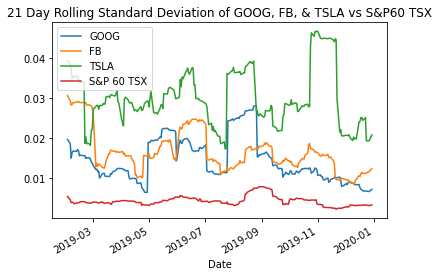

In [57]:
daily_returns.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation of GOOG, FB, & TSLA vs S&P60 TSX')

In [59]:
print(f"CORRELATION BETWEEN RENA'S PORFTFOLIO AND THE S&P 500:")
print(f"The following will cover the calculations and plots for correlation and beta for GOOG stock as compared to the S&P60 TSX.")

CORRELATION BETWEEN RENA'S PORFTFOLIO AND THE S&P 500:
The following will cover the calculations and plots for correlation and beta for GOOG stock as compared to the S&P60 TSX.


In [60]:
correlation = daily_returns.corr()
correlation

,GOOG,FB,TSLA,S&P 60 TSX
GOOG,1.000000,0.555464,0.246404,0.492680
FB,0.555464,1.000000,0.243774,0.443910
TSLA,0.246404,0.243774,1.000000,0.288768
S&P 60 TSX,0.492680,0.443910,0.288768,1.000000


<AxesSubplot:>

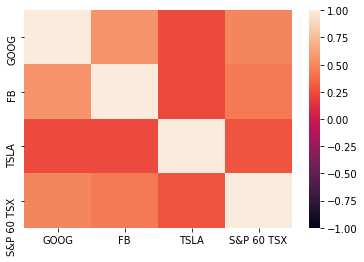

In [61]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

In [62]:
print(f"Calculation and Plot of 60-Day Beta for Rena's Portfolio Compared to S&P 60 TSX")

Calculation and Plot of 60-Day Beta for Rena's Portfolio Compared to S&P 60 TSX


In [63]:
rolling_covariance1 = daily_returns['GOOG'].rolling(window=60).cov(daily_returns['S&P 60 TSX'])
rolling_covariance2 = daily_returns['FB'].rolling(window=60).cov(daily_returns['S&P 60 TSX'])
rolling_covariance3 = daily_returns['TSLA'].rolling(window=60).cov(daily_returns['S&P 60 TSX'])

In [64]:
rolling_variance = daily_returns['S&P 60 TSX'].rolling(window=60).var()
rolling_variance

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-12-20    0.000014
2019-12-23    0.000014
2019-12-24    0.000013
2019-12-27    0.000013
2019-12-30    0.000011
Name: S&P 60 TSX, Length: 245, dtype: float64

In [65]:
rolling_beta_goog = rolling_covariance1 / rolling_variance
rolling_beta_fb = rolling_covariance2 / rolling_variance
rolling_beta_tsla = rolling_covariance3 / rolling_variance

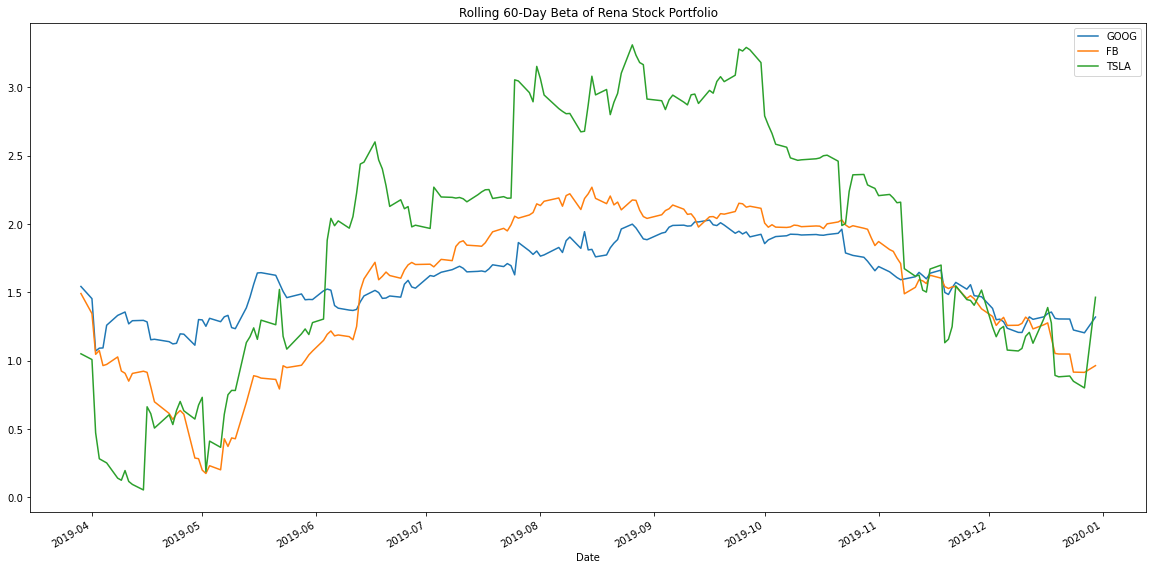

In [68]:
##Plot Betas 
ax = rolling_beta_goog.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Rena Stock Portfolio')
rolling_beta_fb.plot(ax=ax)
rolling_beta_tsla.plot(ax=ax)
                            

# Set the legend of the figure
ax.legend(["GOOG", "FB", "TSLA"])

<AxesSubplot:title={'center':"Sharpe Ratios for Rena's Stock Portfolio"}>

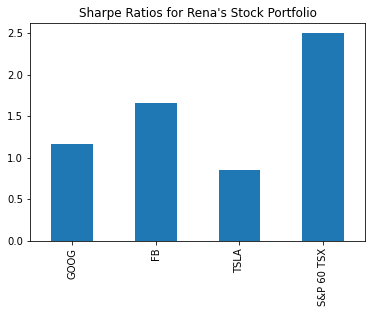

In [69]:
##Calculations for Sharpe Ratios 
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios for Rena's Stock Portfolio")

In [77]:
##Answer assignment questions in raw text(markdown) cells in the report 
output2 = (
    f"Rena's Custom Stock Portfolio Analysis\n"
    f"--------------------------------------\n"
    f"-The chosen stocks for my portfolio include GOOG, FB and TSLA for the period of Jan 1 2019 to Jan 1 2020.\n" 
    f"-Looking at the risk analysis for each portfolio against the S&P 60 TSX, TSLA has the highest volatility.\n"
    f"-Looking at the correlation calculations, it appears that GOOG most closely mimics the S&P 60 TSX.\n"
    f"-Looking at the rolling beta calculations, it appears that FB and TSLA are generally more volatile than the market.\n"
    f"-Finally, looking at the Sharpe Ratio calculations illustrates that FB has a greater return-to-risk ratio than GOOG and TSLA. However, my portfolio does not quite outperform the S&P 60 TSX.\n"
)

#print output to ensure accuracy 
print(output2)

# Output file to text file
text_path2 = "output2.txt"

with open(text_path2,"w") as file:
    
# Write to print to Financial_Analysis_Summary 
    file.write("Rena's Custom Stock Portfolio Analysis")
    file.write("\n")
    file.write("---------------------------------------")
    file.write("\n")
    file.write(f"-The chosen stocks for my portfolio include GOOG, FB and TSLA for the period of Jan 1 2019 to Jan 1 2020.")
    file.write("\n")
    file.write(f"-Looking at the risk analysis for each portfolio against the S&P 60 TSX, TSLA has the highest volatility.")
    file.write("\n")
    file.write(f"-Looking at the correlation calculations, it appears that GOOG most closely mimics the S&P 60 TSX.")
    file.write("\n")
    file.write(f"-Looking at the rolling beta calculations, it appears that FB and TSLA are generally more volatile than the market.")
    file.write("\n")
    file.write(f"-Finally, looking at the Sharpe Ratio calculations illustrates that FB has a greater return-to-risk ratio than GOOG and TSLA. However, my portfolio does not quite outperform the S&P 60 TSX.")

Rena's Custom Stock Portfolio Analysis
--------------------------------------
-The chosen stocks for my portfolio include GOOG, FB and TSLA for the period of Jan 1 2019 to Jan 1 2020.
-Looking at the risk analysis for each portfolio against the S&P 60 TSX, TSLA has the highest volatility.
-Looking at the correlation calculations, it appears that GOOG most closely mimics the S&P 60 TSX.
-Looking at the rolling beta calculations, it appears that FB and TSLA are generally more volatile than the market.
-Finally, looking at the Sharpe Ratio calculations illustrates that FB has a greater return-to-risk ratio than GOOG and TSLA. However, my portfolio does not quite outperform the S&P 60 TSX.

